In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import tensorflow as  tf
# Loading the spam data
df = pd.read_csv('Training Data -Table 1.csv')
df.head(10)

,ExceptionMessage,Queue,Process,ExceptionType,Unnamed: 4
0,Invite not found in both CBS mailbox,Queue-12,Process-9,Business Exception,NaN
1,Interviewer xxxx mail ID not found in invite.,Queue-12,Process-9,Business Exception,NaN
2,Invite not found in both TAX and PAS mailbox,Queue-12,Process-9,Business Exception,NaN
3,InternalFailed to evaluate expression 'Replace...,Queue-14,Process-11,System Exception,NaN
4,Could not execute code stage because exception...,Queue-16,Process-13,System Exception,NaN
5,Email Id not found Failed to read Email,Queue-17,Process-8,Business Exception,NaN
6,Automatically set exception at CleanUp,Queue-1,Process-1,System Exception,NaN
7,Automatically set exception on session end,Queue-19,Process-15,System Exception,NaN
8,Recruiter xxxx mail ID not found in invite.,Queue-12,Process-9,Business Exception,NaN
9,Invite not found in Assurance Mailbox,Queue-12,Process-9,Business Exception,NaN


In [3]:
df.drop(['Queue', 'Process','Unnamed: 4'],axis=1,inplace=True)

In [4]:
import spacy

import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
# nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [5]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [6]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [7]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [8]:
from sklearn.model_selection import train_test_split

X = df['ExceptionMessage'] # the features we want to analyze
ylabels = df['ExceptionType'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f02e8de4690>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 t...\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7f02e9abb950>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

In [10]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)



In [11]:
predicted

array(['System Exception', 'Business Exception', 'System Exception',
       'System Exception', 'System Exception', 'System Exception',
       'System Exception', 'Business Exception', 'Business Exception',
       'System Exception'], dtype=object)

In [12]:
print(X_test)

32    Internal:Failed to perform step 1 in Write Sta...
17    Mandatory field missing - PO not created by pa...
43    Failed to perform step 1 in Read Stage 'Read p...
39    Failed to fetch data from RACE tool due to sit...
41    Could not execute code stage because exception...
6                Automatically set exception at CleanUp
28    Failed to perform step 1 in Write Stage 'Write...
30                   Unable to launch Taleo application
9                 Invite not found in Assurance Mailbox
20    Unexpected Error occured in adding requests in...
Name: ExceptionMessage, dtype: object


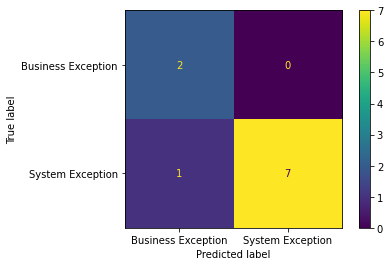

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(pipe, X_test, y_test)
plt.show() 

In [ ]:
df['ExceptionMessage'][:2]

In [ ]:
preds = pipe.predict(df['ExceptionMessage'][:2])

In [ ]:
preds

In [ ]:
df['ExceptionType'][:2]

In [ ]:
import pickle


In [ ]:
from joblib import dump

dump(pipe, filename="text_classification.pkl")

In [ ]:
from joblib import load

# load the saved pipleine model
model = load("text_classification.pkl")

# predict on the sample tweet text
op = model.predict(df['ExceptionMessage'])


In [ ]:
op

In [ ]:
df['ExceptionType'][:2]

In [ ]:
mode = pickle.load(open('model.pkl','rb'))

In [ ]:
op = mode.predict(df['ExceptionMessage'])
len(op)

In [ ]:
op[0]

In [ ]:
df['ExceptionMessage']